# Titanic - Machine Learning from Disaster

## Import thư viện

In [129]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

## Import dữ liệu của train và test

In [130]:
titanic_train = pd.read_csv('./data/train.csv')

titanic_test = pd.read_csv('./data/test.csv')

In [131]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Xem chi tiết dữ liệu của train và test

In [133]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Nhận xét file train:
* Ta thấy có các features như: Cabin, Age, Embarked có các giá trị missing
* Age có 177 hàng dữ liệu bị missing
* Cabin có 687 hàng dữ liệu bị missing
* Embarked có 2 hàng dữ liệu bị missing
* Ticket có dạng string không có nhiều ý nghĩa trong dự đoán

In [134]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Nhận xét file test:
* Ta thấy có các features như: Age, Cabin có các giá trị missing
* Age có 86 dòng dữ liệu missing
* Cabin có 91 dòng dữ liệu missing

## Xem bảng thống kê mô tả của file train và test

In [135]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Nhận xét:
* Feature PassengerId hầu như không có nhiều ý nghĩa trong việc thống kê, dự đoán (xem xét loại bỏ)
* Ta thấy Survived có kiểu dữ liệu interger nhưng đây 1 feature dùng để phân loại thuộc về kiểu categorical
* Ta thấy Pclass dù là kiểu dữ liệu interger nhưng đây là 1 feature dùng để phân loại loại vé (1, 2, 3) thuộc kiểu categorical
* Ta thấy Fare có 1 giá trị max quá cao bỏ khá xa so với giá trị 75%

In [136]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Nhận xét:
* Ta thấy file test cũng có sự phân phối khá giống với file train

## Xử lý dữ liệu


In [137]:
# Tạo X là bản copy của file train

X = titanic_train.copy()

X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [138]:
# Xóa 2 cột PassengerId và Ticket

X = X.drop(['PassengerId', 'Ticket'], axis=1)

X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [139]:
titanic_test = titanic_test.drop(['PassengerId', 'Ticket'], axis=1)

titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [140]:
X['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Nhận xét:

* Ta thấy được rằng các dòng dữ liệu của Cabin có 1 điểm chung là có 1 chữ cái ở đầu và số ở đằng sau

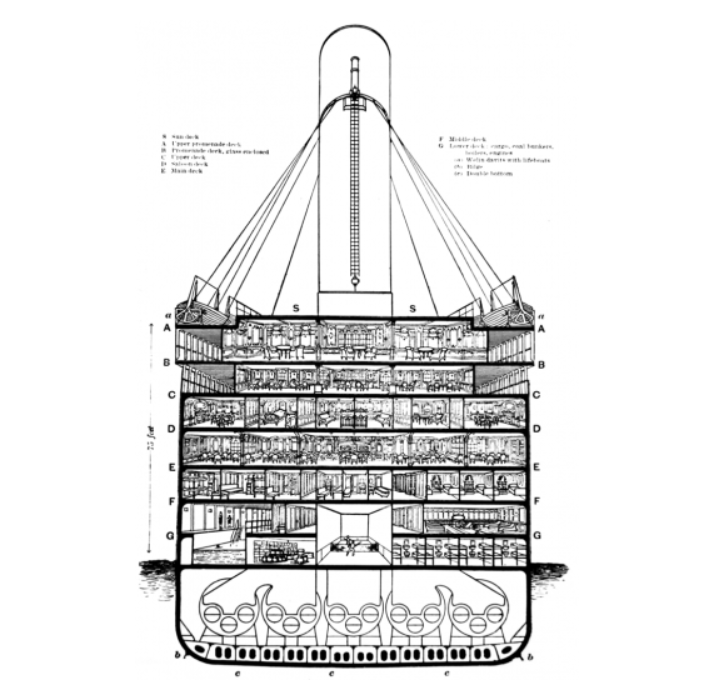

In [141]:
from IPython.display import Image, display

display(Image(filename='./image/image.png'))

* Nhìn vào sơ đồ khoang tàu ta có thể thấy các chữ cái ở đầu mang ý nghĩa là tầng của khoang tàu
* Các tầng được xếp theo từ A - G theo chiều từ trên cao xuống
* Các dữ liệu bị missing có thể là các tầng dành cho nhân viên trên tàu

In [142]:
## Tiếp tục xử lý feature Cabin

def Cabin (cb):
    a = str(cb)[0]
    return a

X['Cabin'] = X['Cabin'].apply(Cabin)


X['Cabin'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [143]:
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S


In [144]:
titanic_test['Cabin'] = titanic_test['Cabin'].apply(Cabin)

titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,n,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,n,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,n,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,n,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,n,S


Ta đã bỏ các số không cần thiết đi chỉ giữ lại chữ cái đầu tiên

### Tiếp theo ta sẽ xử lý đến feature Name

In [145]:
## ta sẽ tách các danh xưng như: Mr, Mrs, Miss,... ra và bỏ đi phần họ và tên của dữ liệu

def name(name):
    return name.split(', ')[1].split('.')[0]

X['Name'] = X['Name'].apply(name)

titanic_test['Name'] = titanic_test['Name'].apply(name)

X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,n,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C
2,1,3,Miss,female,26.0,0,0,7.9250,n,S
3,1,1,Mrs,female,35.0,1,0,53.1000,C,S
4,0,3,Mr,male,35.0,0,0,8.0500,n,S


In [146]:
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,Mr,male,34.5,0,0,7.8292,n,Q
1,3,Mrs,female,47.0,1,0,7.0000,n,S
2,2,Mr,male,62.0,0,0,9.6875,n,Q
3,3,Mr,male,27.0,0,0,8.6625,n,S
4,3,Mrs,female,22.0,1,1,12.2875,n,S


In [147]:
X['Name'].value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

### Ta sẽ tiến hành nhóm các danh xưng lại để tiện trong việc phân tích

In [148]:
def gr_name(name):
    if name == 'Mr':
        return name
    elif name in ['Miss', 'Ms', 'Mlle']:
        return 'Miss'
    elif name in ['Mrs', 'Mme']:
        return 'Mrs'
    elif name == 'Master':
        return name
    else:
        return 'Rare'

X['Group_name'] = X['Name'].apply(gr_name)

titanic_test['Group_name'] = titanic_test['Name'].apply(gr_name)

X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Group_name
0,0,3,Mr,male,22.0,1,0,7.2500,n,S,Mr
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C,Mrs
2,1,3,Miss,female,26.0,0,0,7.9250,n,S,Miss
3,1,1,Mrs,female,35.0,1,0,53.1000,C,S,Mrs
4,0,3,Mr,male,35.0,0,0,8.0500,n,S,Mr


In [149]:
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Group_name
0,3,Mr,male,34.5,0,0,7.8292,n,Q,Mr
1,3,Mrs,female,47.0,1,0,7.0000,n,S,Mrs
2,2,Mr,male,62.0,0,0,9.6875,n,Q,Mr
3,3,Mr,male,27.0,0,0,8.6625,n,S,Mr
4,3,Mrs,female,22.0,1,1,12.2875,n,S,Mrs


In [150]:
# Xóa đi cột Name

X = X.drop('Name', axis=1)

titanic_test = titanic_test.drop('Name', axis=1)

In [151]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Group_name
0,0,3,male,22.0,1,0,7.2500,n,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,1,3,female,26.0,0,0,7.9250,n,S,Miss
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs
4,0,3,male,35.0,0,0,8.0500,n,S,Mr


## Tiếp theo ta sẽ gom nhóm tuổi 

In [152]:
X['Age'].fillna(X['Age'].median(), inplace=True)

X['Age'] = pd.cut(X['Age'], bins=[0, 12, 18, 30, 50, 120], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

X.head()


C:\Users\MSI VN\AppData\Local\Temp\ipykernel_20696\334744109.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Group_name
0,0,3,male,Young Adult,1,0,7.2500,n,S,Mr
1,1,1,female,Adult,1,0,71.2833,C,C,Mrs
2,1,3,female,Young Adult,0,0,7.9250,n,S,Miss
3,1,1,female,Adult,1,0,53.1000,C,S,Mrs
4,0,3,male,Adult,0,0,8.0500,n,S,Mr


In [153]:
titanic_test['Age'] = pd.cut(titanic_test['Age'], bins=[0, 12, 18, 30, 50, 120], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Group_name
0,3,male,Adult,0,0,7.8292,n,Q,Mr
1,3,female,Adult,1,0,7.0000,n,S,Mrs
2,2,male,Senior,0,0,9.6875,n,Q,Mr
3,3,male,Young Adult,0,0,8.6625,n,S,Mr
4,3,female,Young Adult,1,1,12.2875,n,S,Mrs


### Cuối cùng thì ta sẽ gom nhóm giá tiền của vé Fare

In [154]:
## Chia Fare ra làm 4 phần bằng nhau

X['Fare'] = pd.qcut(X['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [155]:
X['Fare'].value_counts()

Fare
Medium       224
Low          223
High         222
Very High    222
Name: count, dtype: int64

In [156]:
titanic_test['Fare'] = pd.qcut(titanic_test['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

titanic_test['Fare'].value_counts()

Fare
Low          114
High         105
Very High    102
Medium        96
Name: count, dtype: int64

## Tương quan dữ liệu

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

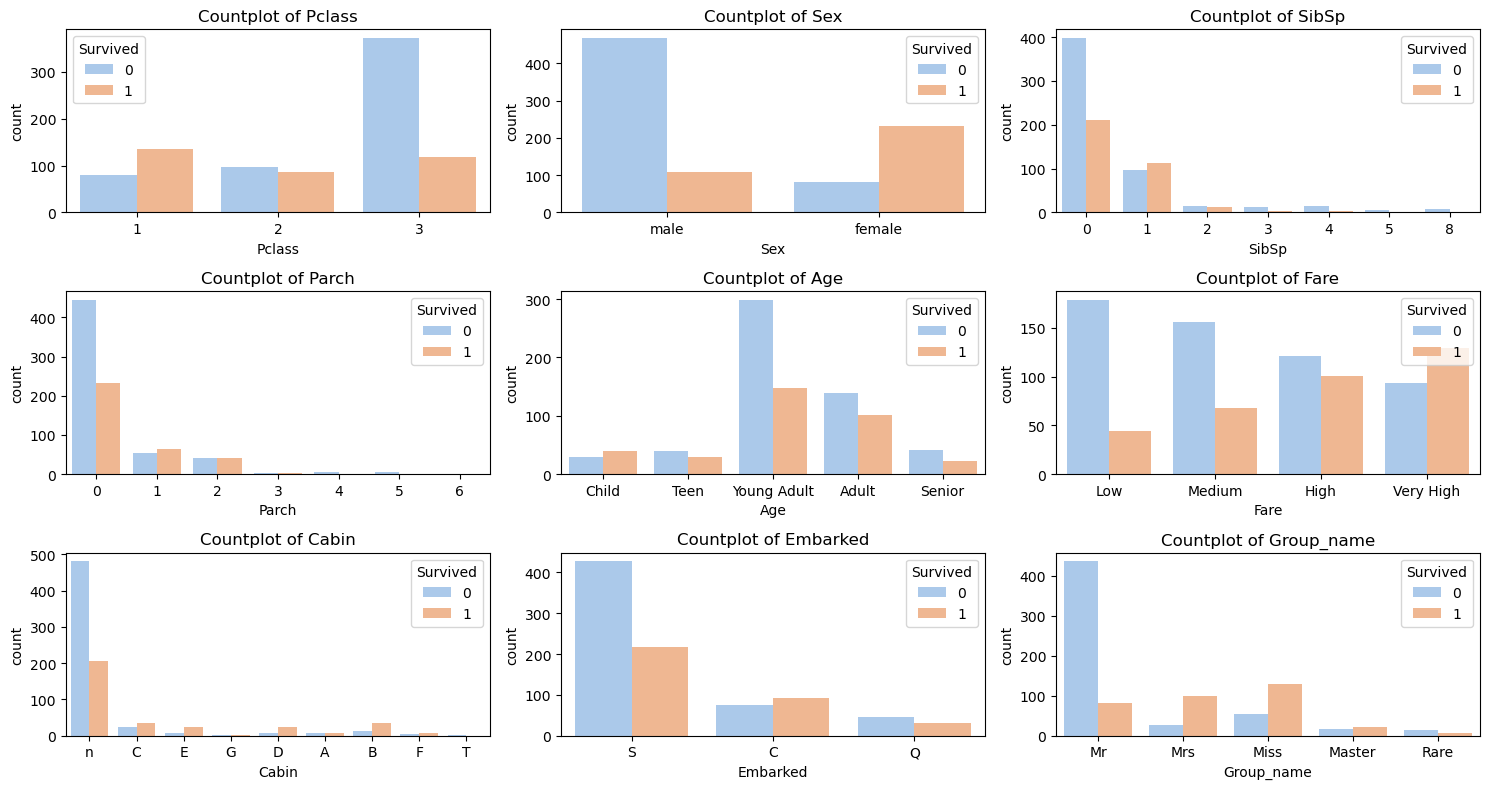

In [158]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Age', 'Fare', 'Cabin', 'Embarked', 'Group_name']

plt.figure(figsize=(15, 8))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)  
    sns.countplot(data=X, x=col, hue='Survived', palette='pastel');
    plt.title(f'Countplot of {col}')
    plt.tight_layout()


### Nhận xét:
* Đối với Pclass ta thấy tỉ lệ sống sót của vé loại 1, 2 khá cao, còn lại thì loại vé 3 tỉ lệ sống sót khá thấp. Cho thấy được loại vé càng cao thì tỉ lệ sống sót càng cao.
* Đối với giới tính thì ta thấy được tỉ lệ nữ sống sót nhiều hơn nam. Cho thấy được trong lúc xảy ra thảm họa thì phụ nữ luôn được ưu tiên cứu hộ.
* Đối với SibSp thì ta thấy với các giá trị càng cao thì tỉ lệ sống sót khá thấp. Với giá trị 1, 2 thì ta thấy được tỉ lệ sống sót cao hơn.
* Đối với Parch thì ta thấy tỉ lệ sống sót với từng giá trị gần giống SibSp.
* Đối với Age thì ta thấy được tỉ lệ sống sót của Child và Teen cao hơn phần còn lại. Cho thấy trẻ em sẽ được ưu tiên cứu hộ trong thảm họa.
* Đối với Fare thì ta thấy giá vé càng đắt thì tỉ lệ sống sót càng cao, còn giá vé trung bình hoặc thấp sẽ có tỉ lệ sống sót thấp.
* Đối với Cabin ta thấy được các dữ liệu bị missing có tỉ lệ sống sót thấp, còn các tầng khác thì tỉ lệ sống sót cao hơn.
* Đối với Embarked thì ta thấy được là các hành khách đến từ Southampton thường có tỉ lệ sống sót thấp hơn so với các hành khách đến từ Cherbourg và Queenstown.
* Đối với Group_name thì ta thấy được tỉ lệ sống sót của Mr khá thấp khi so với các nhóm khác. Nhóm Mrs, Miss có tỉ lệ sống sót cao.

## Chuyển các dữ liệu thành số

In [159]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Group_name
0,0,3,male,Young Adult,1,0,Low,n,S,Mr
1,1,1,female,Adult,1,0,Very High,C,C,Mrs
2,1,3,female,Young Adult,0,0,Medium,n,S,Miss
3,1,1,female,Adult,1,0,Very High,C,S,Mrs
4,0,3,male,Adult,0,0,Medium,n,S,Mr


## Ta tiến hành biến đổi các dữ liệu của các features dạng object thành số
* Sex sẽ được chuyển đổi thành 0,1 ('male': 0, 'female': 1)
* Age sẽ được chuyển đổi lần lượt Child - Senior thành 1 - 5
* Fare sẽ được chuyển đổi lần lượt Low - Very High thành 1 - 4
* Cabin sẽ được chuyển đổi lần lượt n - T thành 0 - 8
* Embarked sẽ được chuyển đổi thành 1,2,3 ('S': 1, 'C': 2, 'Q': 3)
* Group_name sẽ được chuyển đổi lần lượt Mr - Rare thành 1 - 5


### Trước tiên ta sẽ xử lý các giá trị missing của các feature còn lại

In [160]:
# điền các giá trị missing của Embarked bằng giá trị mode của toàn cột
X['Embarked'].fillna(X['Embarked'].mode(), inplace=True)

C:\Users\MSI VN\AppData\Local\Temp\ipykernel_20696\1911764687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Embarked'].fillna(X['Embarked'].mode(), inplace=True)


In [161]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    object  
 3   Age         891 non-null    category
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    category
 7   Cabin       891 non-null    object  
 8   Embarked    889 non-null    object  
 9   Group_name  891 non-null    object  
dtypes: category(2), int64(4), object(4)
memory usage: 58.0+ KB


### Xem xét biểu đồ heatmap

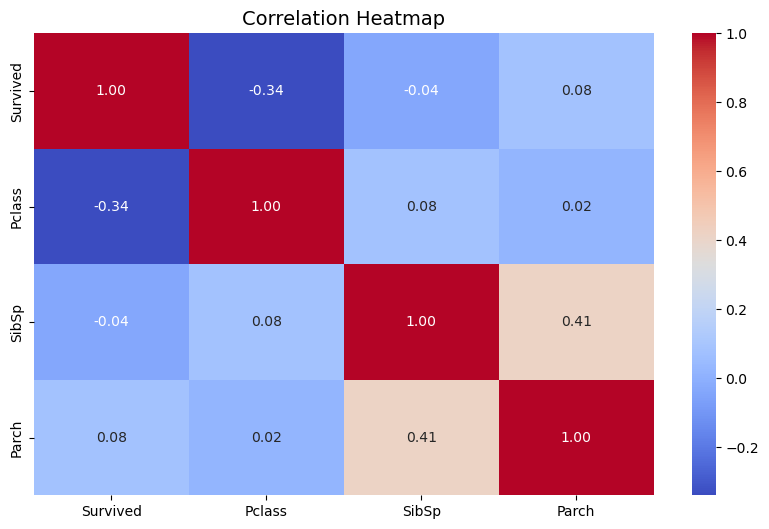

In [162]:
corr = X.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

In [163]:
X['Group_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)